In [41]:
import os
import numpy as np
# 读取训练集、测试集
X_train = np.load(r"D:\Dataset\Marine-Mammal-Target-Classification\01_PreProcess\X_train.npy")
X_test = np.load(r"D:\Dataset\Marine-Mammal-Target-Classification\01_PreProcess\X_test.npy")
Y_train = np.load(r"D:\Dataset\Marine-Mammal-Target-Classification\01_PreProcess\y_train.npy")
Y_test = np.load(r"D:\Dataset\Marine-Mammal-Target-Classification\01_PreProcess\y_test.npy")
ids_test = np.load(r"D:\Dataset\Marine-Mammal-Target-Classification\01_PreProcess\ids_test.npy")
ids_train = np.load(r"D:\Dataset\Marine-Mammal-Target-Classification\01_PreProcess\ids_train.npy")

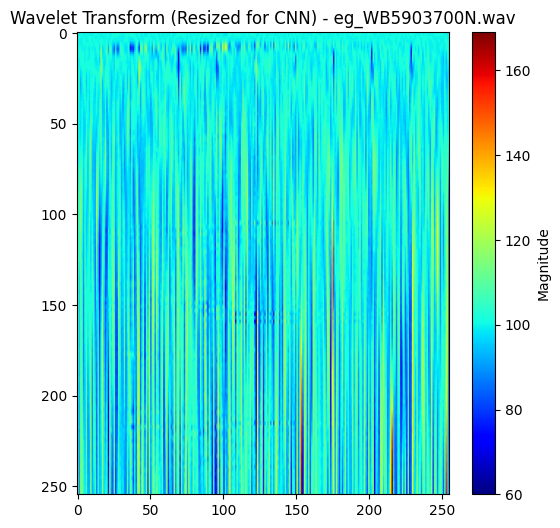

Playing audio for Sample eg_WB5903700N.wav


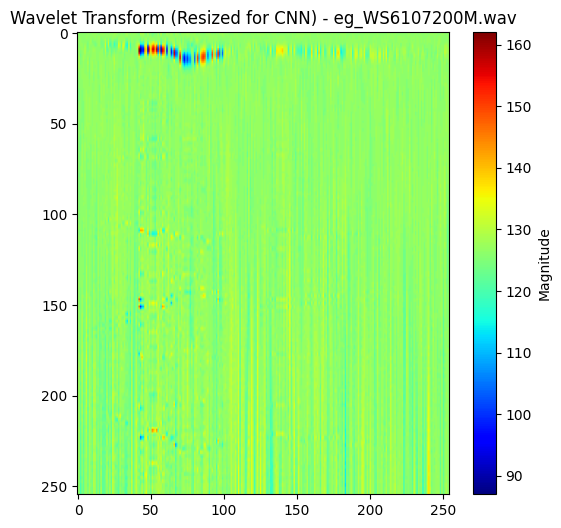

Playing audio for Sample eg_WS6107200M.wav


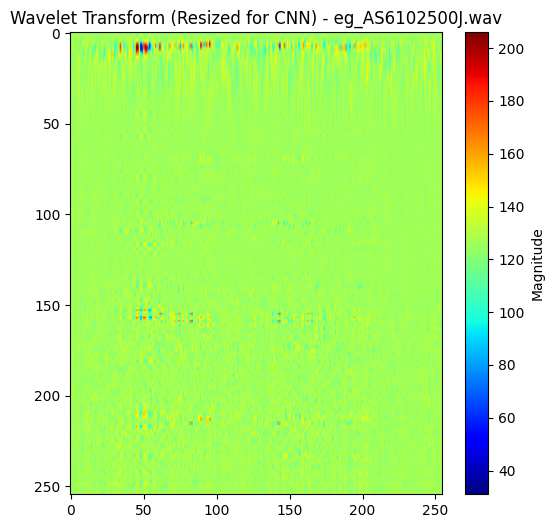

Playing audio for Sample eg_AS6102500J.wav


In [ ]:
import numpy as np
import pywt
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
import os
import cv2  # 用于调整图像尺寸
from IPython.display import Audio

# 文件路径
file_paths = [
    r"D:\Dataset\Marine-Mammal-Target-Classification\02_Features\eg_WB5903700N.wav",
    r"D:\Dataset\Marine-Mammal-Target-Classification\02_Features\eg_WS6107200M.wav",
    r"D:\Dataset\Marine-Mammal-Target-Classification\02_Features\eg_AS6102500J.wav"
]

# 选择小波基
wavelet = 'morl'  # 'mexh' 也可以

# CNN 目标输入尺寸
target_size = (255, 255)  # 适配 CNN（可改为 128x128）

# 遍历所有文件并绘制小波变换图
for file_path in file_paths:
    # 读取 WAV 文件
    sample_rate, data = wav.read(file_path)

    # 如果是双声道音频，取一个通道
    if len(data.shape) > 1:
        data = data[:, 0]

    # 归一化到 [-1, 1]
    data = data.astype(np.float32)
    data = data / np.max(np.abs(data))

    # 生成尺度范围
    scales = np.arange(1, 128)

    # 计算小波变换
    coefficients, frequencies = pywt.cwt(data, scales, wavelet, 1.0 / sample_rate)

    # 归一化到 [0, 255]，但保留正负信息。有点绿。
    coef_min, coef_max = np.min(coefficients), np.max(coefficients)
    coef_img = (coefficients - coef_min) / (coef_max - coef_min)  # 归一化到 [0,1]
    cwt_image = (coef_img * 255).astype(np.uint8)  # 归一化到 [0,255] 并转换数据类型
    
    # 取绝对值并归一化到 [0, 255]
    #cwt_image = np.abs(coefficients)
    #cwt_image = (cwt_image - np.min(cwt_image)) / (np.max(cwt_image) - np.min(cwt_image))  # 归一化到 [0, 1]
    #cwt_image = (cwt_image * 255).astype(np.uint8)  # 转换为 uint8 格式
    #两种归一化方式，效果可能不同

    # 调整分辨率以适应 CNN（如 224x224）
    cwt_resized = cv2.resize(cwt_image, target_size, interpolation=cv2.INTER_CUBIC)

    # 绘制调整后的小波变换图
    plt.figure(figsize=(6, 6))
    plt.imshow(cwt_resized, aspect='auto', cmap='jet')
    plt.colorbar(label='Magnitude')
    plt.title(f"Wavelet Transform (Resized for CNN) - {os.path.basename(file_path)}")
    plt.show()

    # 播放音频
    print(f"Playing audio for Sample {os.path.basename(file_path)}")
    display(Audio(data, rate=sample_rate))


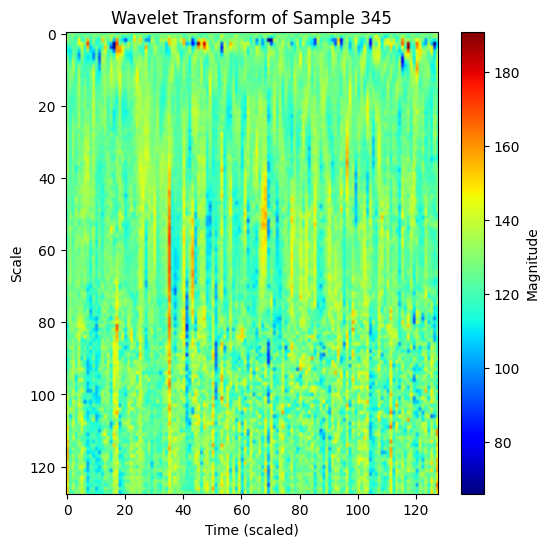

Playing audio for Sample 6102500R_seg56


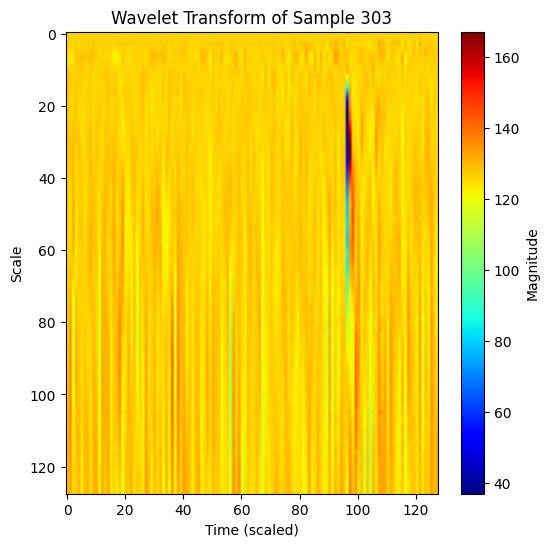

Playing audio for Sample 59037007_seg2


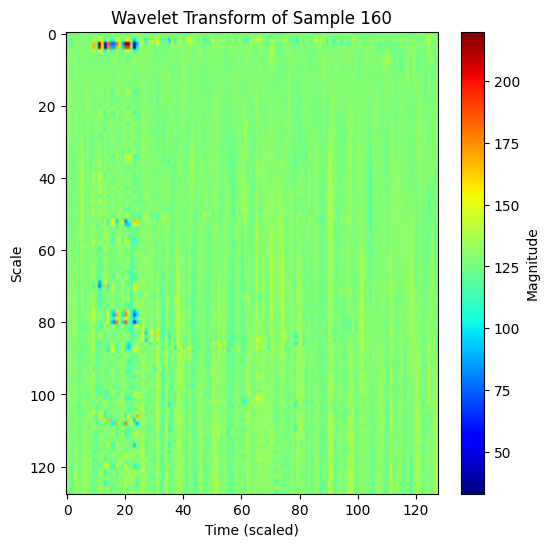

Playing audio for Sample 61072032_seg46


In [48]:
import numpy as np
import pywt
import matplotlib.pyplot as plt
import cv2  # 用于调整图像尺寸
import random
from IPython.display import Audio

# 选取3个随机样本
random_indices = random.sample(range(X_train.shape[0]), 3)
selected_signals = X_train[random_indices, :]
selected_ids = ids_train[random_indices]

# 选择小波基
wavelet = 'morl'
scales = np.arange(1, 128)  # 设定尺度范围
sampling_rate = 60600  # 假设的采样率，可根据数据调整

# 遍历所选样本并绘制小波变换图
for i, signal in enumerate(selected_signals):
    # 归一化到 [-1, 1]
    signal = signal.astype(np.float32)
    signal = signal / np.max(np.abs(signal))

    # 计算小波变换
    coefficients, frequencies = pywt.cwt(signal, scales, wavelet, 1.0 / sampling_rate)

    # 归一化到 [0, 255]，但保留正负信息。有点绿。
    coef_min, coef_max = np.min(coefficients), np.max(coefficients)
    coef_img = (coefficients - coef_min) / (coef_max - coef_min)  # 归一化到 [0,1]
    cwt_image = (coef_img * 255).astype(np.uint8)  # 归一化到 [0,255] 并转换数据类型
    

    # 调整小波变换图像的尺寸（128×128）
    cwt_resized = cv2.resize(cwt_image, (128, 128), interpolation=cv2.INTER_CUBIC)

    # 绘图
    plt.figure(figsize=(6, 6))
    plt.imshow(cwt_resized, aspect='auto', cmap='jet')
    plt.colorbar(label='Magnitude')
    plt.ylabel("Scale")
    plt.xlabel("Time (scaled)")
    plt.title(f"Wavelet Transform of Sample {random_indices[i]}")
    plt.show()

    # 播放音频
    print(f"Playing audio for Sample {selected_ids[i]}")
    display(Audio(signal, rate=sampling_rate))  # 采样率可根据数据调整
